# <center> Курсовая работа
## <center> по дисциплине "Технологии машинного обучения"

### Задание:
    
    
    1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
    2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
    3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
    4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
    5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
    6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
    7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
    8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
    9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
    10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
    11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

## 1. Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных мы будем использовать набор данных [комиксов](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset)

В ходе курсовой работы я буду исследовать зависимость категории Плохой/Хороший герой от внешних качеств персонажа. Если рассмотреть данную задачу в проекции на людей, данный проект поможет анализировать возможные поступки людей исходя из их внешних параметров

Датасет состоит из трех файлов:
- dc-wikia-data.csv - набор данных о комиксах студии DC
- marvel-wikia-data.csv - набор данных о комиксах студии Marvel

Каждый файл содержит следующие колонки:

 - `page_id` - идентификатор персонажа
 - `name` - имя
 - `urlslug` - ссылка на страницу персонажа
 - `ID` - Персонаж открытых или секретный
 - `ALING` - Положительный/Отрицательный/Нейстральный
 - `EYE` - цвет глаз
 - `HAIR` - цвет волос
 - `SEX` - пол
 - `GSM` - ориентация
 - `ALIVE` - Живой/Мертвый
 - `APPEARANCES` - количество появлений в комиксах
 - `FIRST APPEARANCE` - дата первого появления
 - `YEAR` - год первого появления

В данной работе будем решать обе задачи - и задачу классификации, и задачу регрессии:
- Для решения **задачи классификации** в качестве целевого признака будем использовать "ALING"
- Для решения **задачи регрессии** в качестве целевого признака будем использовать "APPEARANCES"

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Загрузка данных

In [4]:
data_dc = pd.read_csv('../Dataset/comics/dc-wikia-data.csv', sep=",")

In [5]:
data_marvel = pd.read_csv('../Dataset/comics/marvel-wikia-data.csv', sep=",")

## 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### 2.1. Основные характеристики датасетов

In [6]:
data_dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [7]:
data_marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"64786,""Wolverine (James \""""Logan\"""" Howlett)"",...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1868,""Iron Man (Anthony \""""Tony\"""" Stark)"",\/I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


**Размер наборов данных**

In [8]:
data_dc.shape, data_marvel.shape

((6896, 13), (16376, 13))

### Типы данных

In [9]:
data_dc.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [10]:
data_marvel.dtypes

page_id              object
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

### Проверим на наличие пропущенных значений

In [11]:
data_dc.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [12]:
data_marvel.isnull().sum()

page_id                 0
name                   51
urlslug                51
ID                   3813
ALIGN                2856
EYE                  9804
HAIR                 4308
SEX                   904
GSM                 16286
ALIVE                  54
APPEARANCES          1143
FIRST APPEARANCE      863
YEAR                  863
dtype: int64

Вывод: Представленные наборы данных содержат пропуски, поэтому перед работой с ними необходимо удалить ненужные колонки и заполнить пропуски в нужных

### Удаление ненужных данных

In [13]:
# Удаление колонок, содержащих пустые значения
data_dc = data_dc.drop(['GSM'], axis = 1)

In [14]:
# Удаление колонок, содержащих ненужные данные: 
data_dc = data_dc.drop(['page_id'], axis = 1)
data_dc = data_dc.drop(['urlslug'], axis = 1)
data_dc = data_dc.drop(['FIRST APPEARANCE'], axis = 1)

In [15]:
# Удаление строк, содержащих пустые значения
data_dc = data_dc.dropna(axis=0, how='any')

In [16]:
(data_dc.isnull().sum(), data_dc.shape)

(name           0
 ID             0
 ALIGN          0
 EYE            0
 HAIR           0
 SEX            0
 ALIVE          0
 APPEARANCES    0
 YEAR           0
 dtype: int64, (2097, 9))

In [17]:
# Удаление колонок, содержащих пустые значения
data_marvel = data_marvel.drop(['GSM'], axis = 1)

In [18]:
# Удаление колонок, содержащих ненужные данные: 
data_marvel = data_marvel.drop(['page_id'], axis = 1)
data_marvel = data_marvel.drop(['urlslug'], axis = 1)
data_marvel = data_marvel.drop(['FIRST APPEARANCE'], axis = 1)

In [19]:
# Удаление строк, содержащих пустые значения
data_marvel = data_marvel.dropna(axis=0, how='any')

In [20]:
(data_marvel.isnull().sum(), data_marvel.shape)

(name           0
 ID             0
 ALIGN          0
 EYE            0
 HAIR           0
 SEX            0
 ALIVE          0
 APPEARANCES    0
 YEAR           0
 dtype: int64, (4374, 9))

### Преобразуем категориальные данные в числовые

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [22]:
le = LabelEncoder()
    # "ALIGN" - пол
le.fit(data_dc['ALIGN'].drop_duplicates()) 
data_dc['ALIGN'] = le.transform(data_dc['ALIGN'])
le.fit(data_dc['ID'].drop_duplicates()) 
data_dc['ID'] = le.transform(data_dc['ID'])
le.fit(data_dc['EYE'].drop_duplicates()) 
data_dc['EYE'] = le.transform(data_dc['EYE'])
le.fit(data_dc['HAIR'].drop_duplicates()) 
data_dc['HAIR'] = le.transform(data_dc['HAIR'])
le.fit(data_dc['SEX'].drop_duplicates()) 
data_dc['SEX'] = le.transform(data_dc['SEX'])
le.fit(data_dc['ALIVE'].drop_duplicates()) 
data_dc['ALIVE'] = le.transform(data_dc['ALIVE'])

In [23]:
le.fit(data_marvel['ALIGN'].drop_duplicates()) 
data_marvel['ALIGN'] = le.transform(data_marvel['ALIGN'])
le.fit(data_marvel['ID'].drop_duplicates()) 
data_marvel['ID'] = le.transform(data_marvel['ID'])
le.fit(data_marvel['EYE'].drop_duplicates()) 
data_marvel['EYE'] = le.transform(data_marvel['EYE'])
le.fit(data_marvel['HAIR'].drop_duplicates()) 
data_marvel['HAIR'] = le.transform(data_marvel['HAIR'])
le.fit(data_marvel['SEX'].drop_duplicates()) 
data_marvel['SEX'] = le.transform(data_marvel['SEX'])
le.fit(data_marvel['ALIVE'].drop_duplicates()) 
data_marvel['ALIVE'] = le.transform(data_marvel['ALIVE'])

### Выведем статистические показатели по всем параметрам таблиц

In [24]:
data_dc.describe()

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,1.487363,0.748689,3.561278,3.521221,1.273724,0.730567,47.188364,1987.238436
std,0.501864,0.641503,3.256407,4.711389,0.961293,0.443771,142.201617,18.395501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1936.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,1981.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,12.000000,1990.000000
75%,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,37.000000,2001.000000
max,2.000000,3.000000,15.000000,15.000000,2.000000,1.000000,3093.000000,2012.000000


In [25]:
data_marvel.describe()

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000
mean,2.431184,0.788523,6.203704,5.954504,2.380430,0.722451,44.374943,1989.532693
std,0.709735,0.737947,5.651910,5.358750,0.929847,0.447841,161.828260,17.409009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1939.000000
25%,2.000000,0.000000,3.000000,2.000000,1.000000,0.000000,3.000000,1977.000000
50%,3.000000,1.000000,4.000000,3.000000,3.000000,1.000000,8.000000,1993.000000
75%,3.000000,1.000000,6.000000,8.000000,3.000000,1.000000,26.000000,2004.000000
max,3.000000,2.000000,22.000000,21.000000,3.000000,1.000000,4043.000000,2013.000000


### Построим некоторые графики для понимания структуры данных

D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


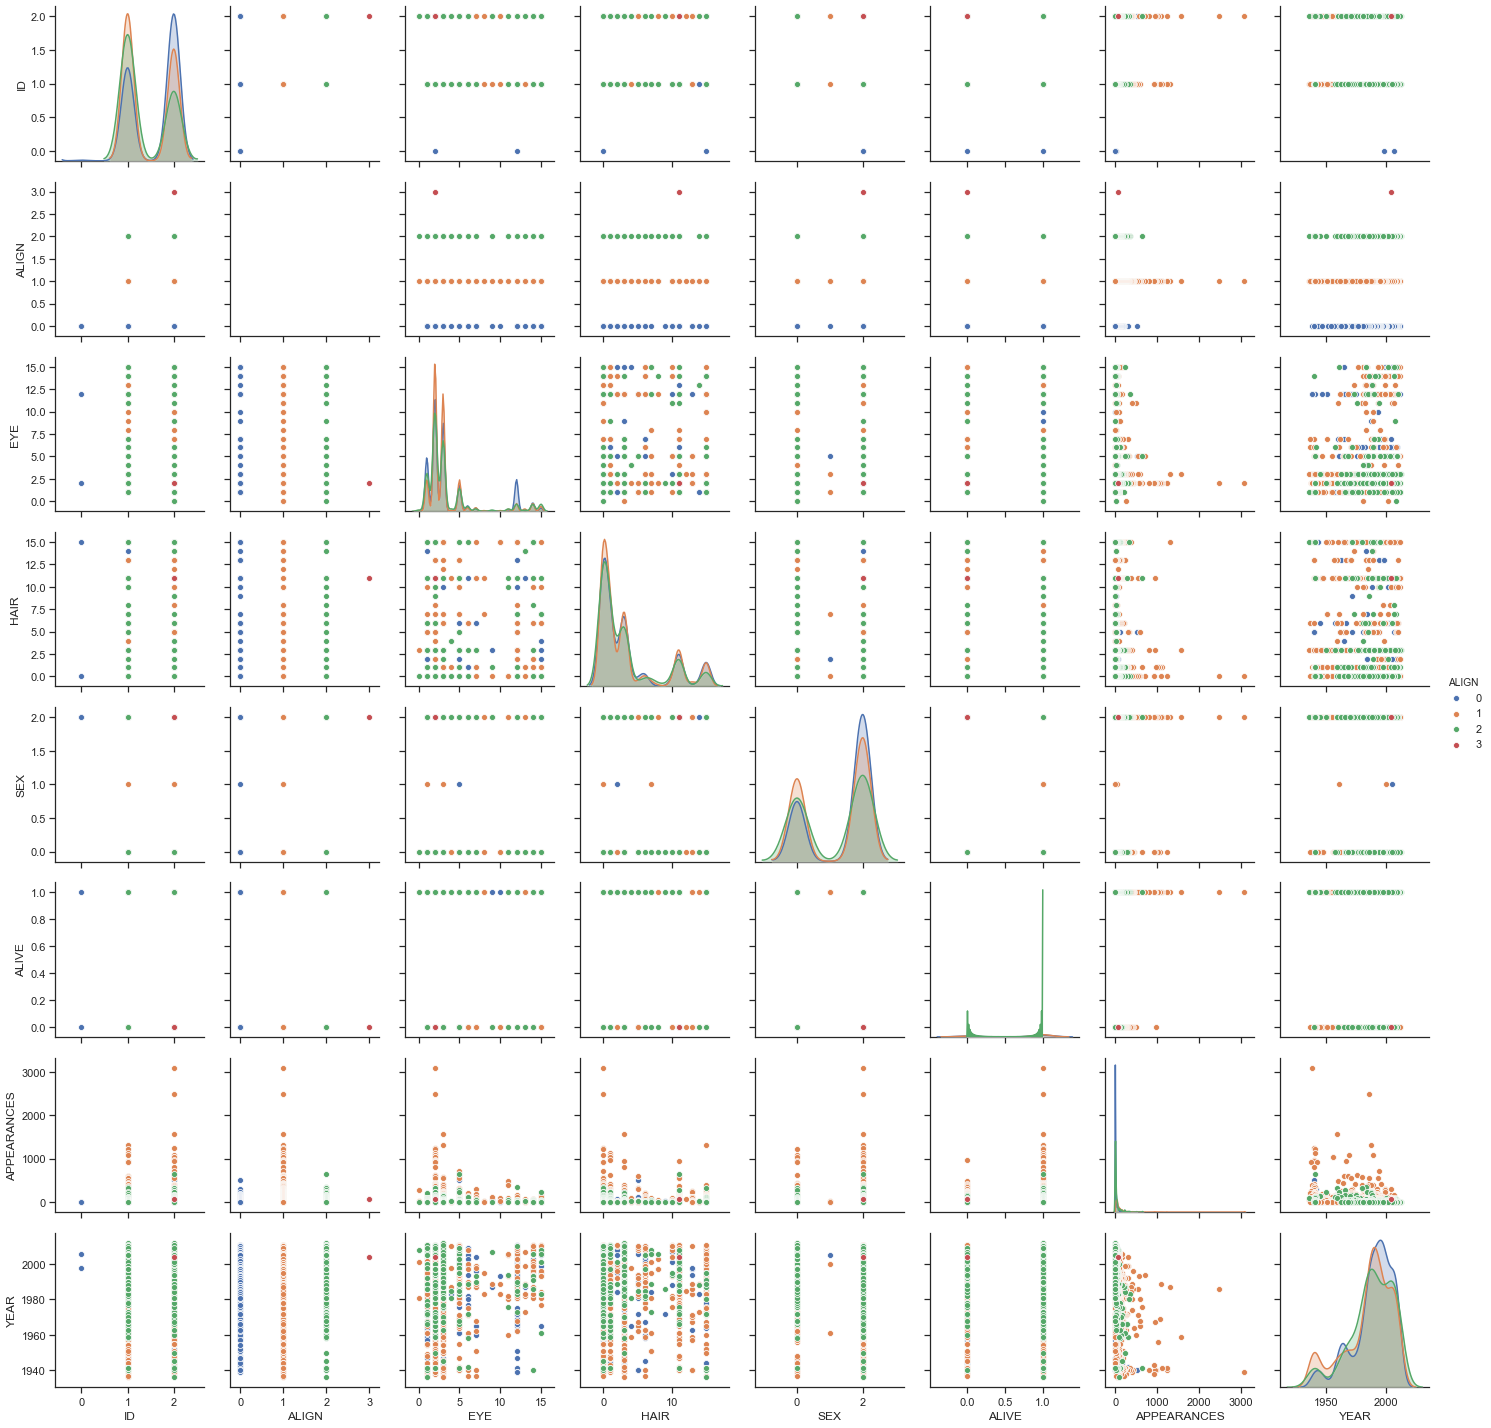

In [26]:
# Парные диаграммы
sns.pairplot(data_dc, hue="ALIGN")

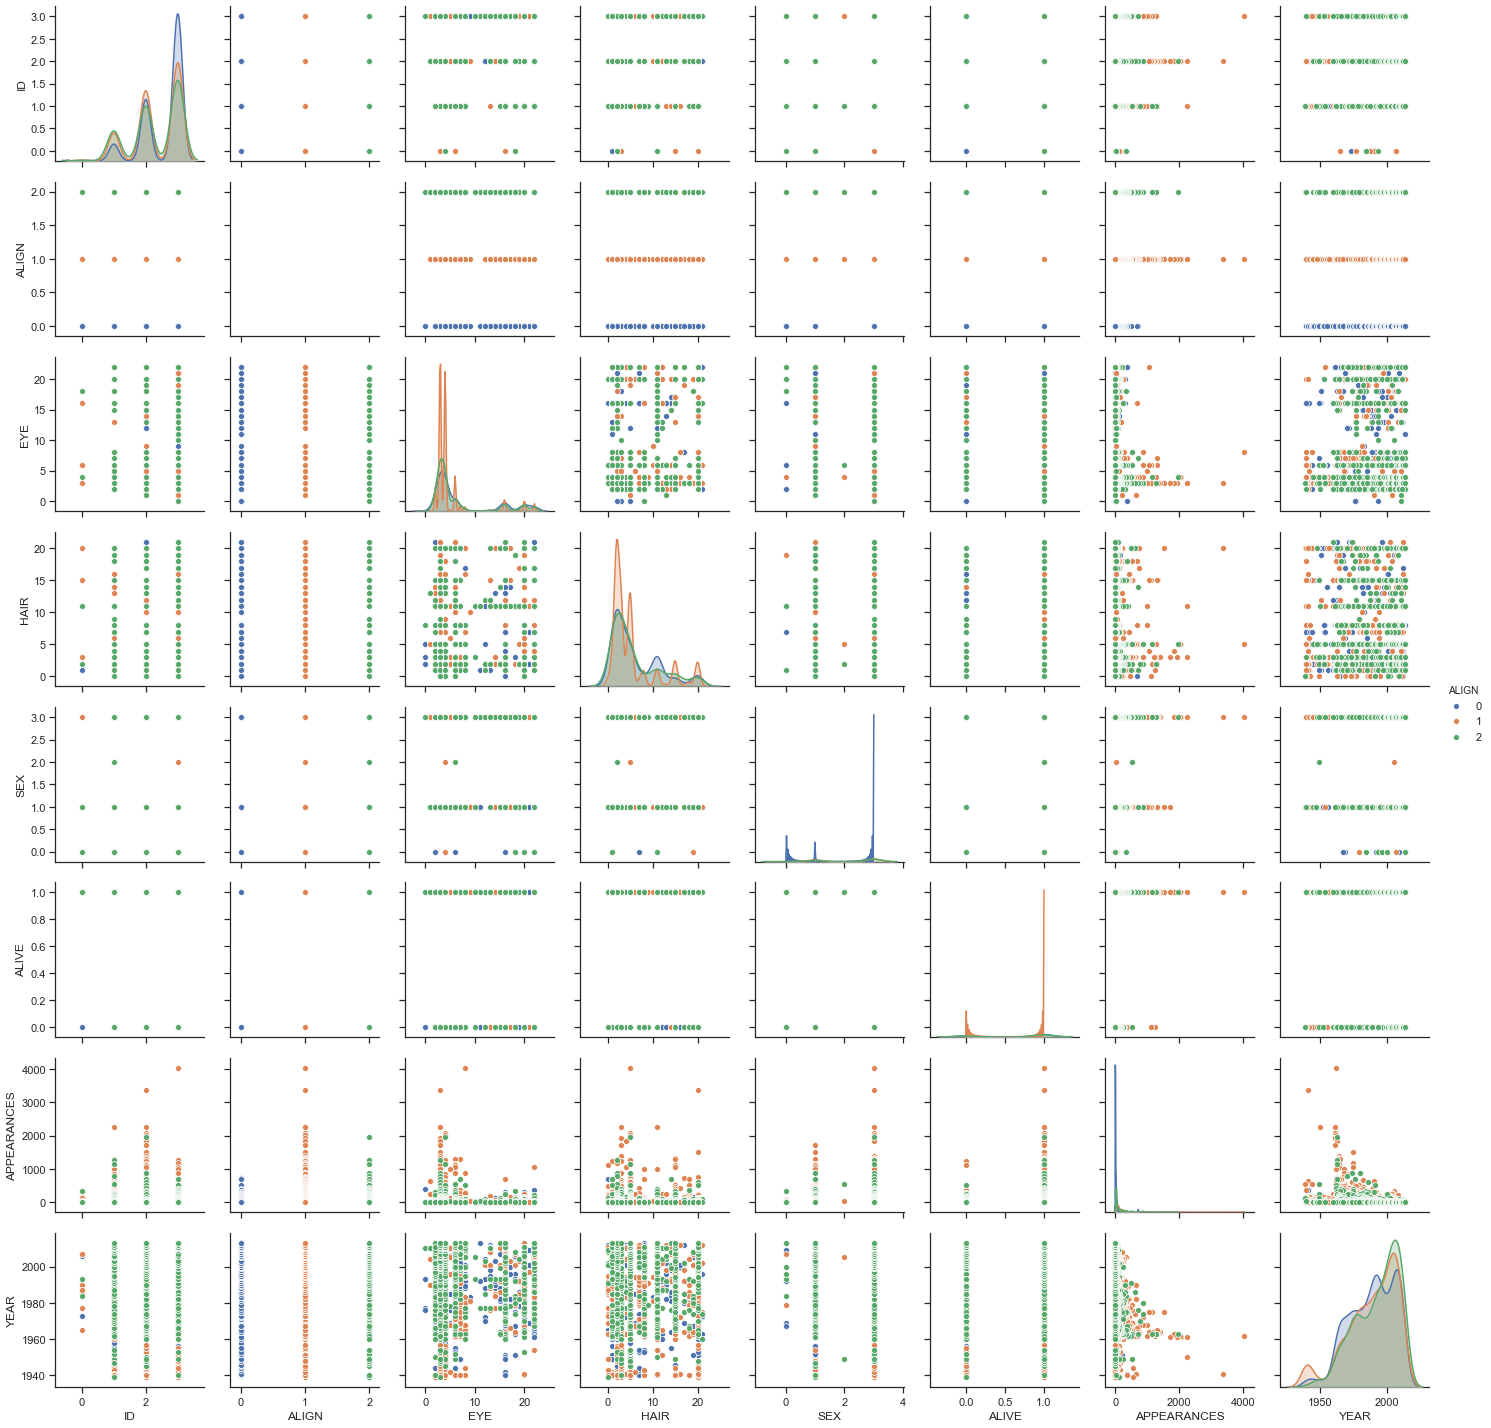

In [27]:
sns.pairplot(data_marvel, hue="ALIGN")

In [28]:
# Определим все значения для целевойго признака
(data_dc['ALIGN'].unique(), data_marvel['ALIGN'].unique())

(array([1, 2, 0, 3], dtype=int64), array([1, 2, 0], dtype=int64))

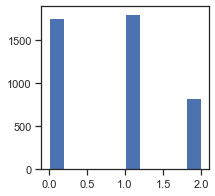

In [29]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(3,3)) 
plt.hist(data_marvel['ALIGN'])
plt.show()

In [30]:
data_dc['ALIGN'].value_counts()

1    1105
0     760
2     231
3       1
Name: ALIGN, dtype: int64

In [31]:
data_marvel['ALIGN'].value_counts()

1    1797
0    1751
2     826
Name: ALIGN, dtype: int64

### Дисбаланс классов

In [32]:
total_dc = data_dc.shape[0]
class_0, class_1, class_2, class_3 = data_dc['ALIGN'].value_counts()
print('Класс 0 составляет {}%, класс 1 составляет {}%, класс 2 составляет {}%'
      .format(round(class_0 / total_dc, 4)*100, round(class_1 / total_dc, 4)*100, round(class_2 / total_dc, 4)*100))
total_marvel = data_marvel.shape[0]
class_0, class_1, class_2 = data_marvel['ALIGN'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%, класс 2 составляет {}%'
      .format(round(class_0 / total_marvel, 4)*100, round(class_1 / total_marvel, 4)*100, round(class_2 / total_marvel, 4)*100))

Класс 0 составляет 52.690000000000005%, класс 1 составляет 36.24%, класс 2 составляет 11.020000000000001%
Класс 0 составляет 41.08%, а класс 1 составляет 40.03%, класс 2 составляет 18.88%


**Вывод: Дисбаланс классов присутствует, но является приемлемым**

In [33]:
data_dc.columns

Index(['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES',
       'YEAR'],
      dtype='object')

### Скрипичные диаграммы для числовых колонок

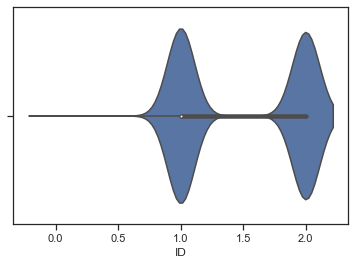

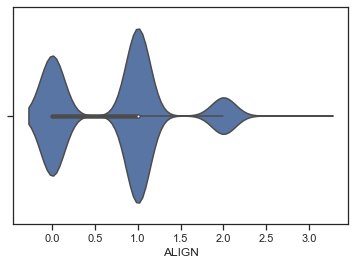

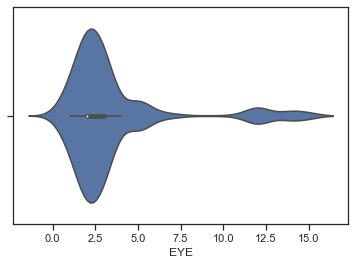

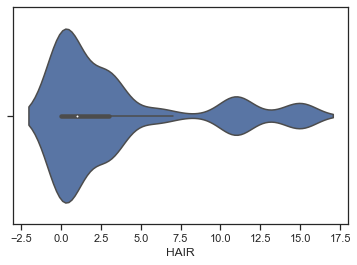

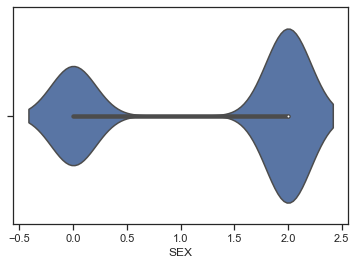

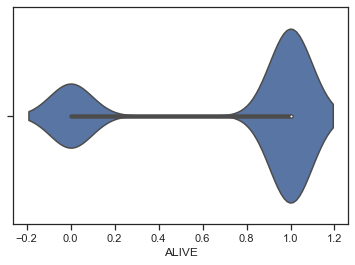

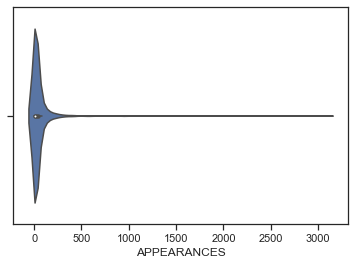

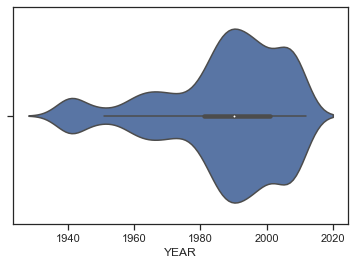

In [34]:
# Скрипичные диаграммы для числовых колонок
for col in ['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR']:
    sns.violinplot(x = data_dc[col])
    plt.show()

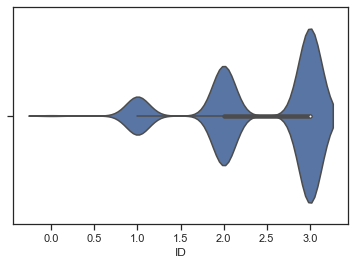

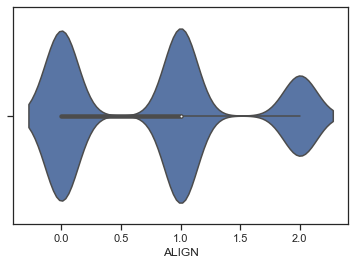

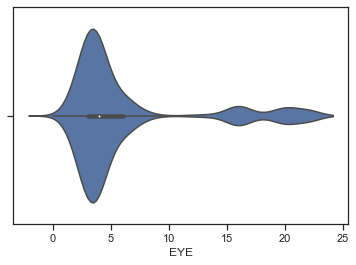

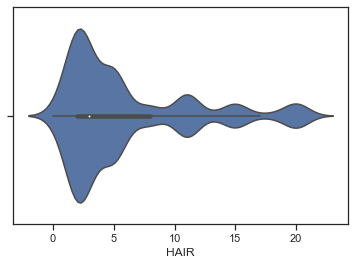

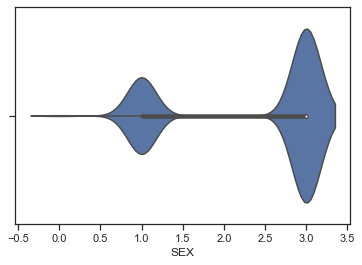

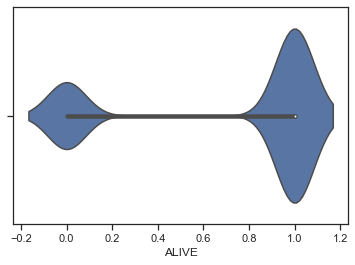

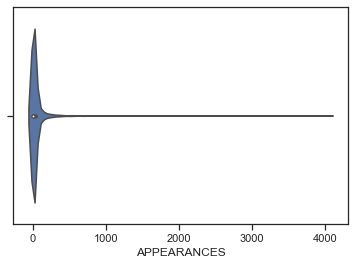

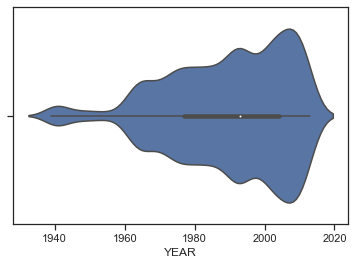

In [35]:
for col in ['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR']:
    sns.violinplot(x = data_marvel[col])
    plt.show()

## 3. Выбор признаков, подходящих для построения моделей.
## Масштабирование данных. 
## Формирование вспомогательных признаков, улучшающих качество моделей.

Для построения моделей будем использовать все признаки кроме признака name, потому что он является уникальным для всех записей.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных. Для этого необходимо объединить обучающую и тестовые выборки.

### 3.1. Вспомогательная колонка

In [36]:
# Создадим вспомогательные колонки, 
# чтобы наборы данных можно было объединить.
data_dc['dataset'] = 0
data_marvel['dataset'] = 1

In [37]:
# Колонки для объединения
join_cols_dc = ['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES','YEAR', 'dataset']
join_cols_marvel = ['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES','YEAR', 'dataset']

In [38]:
data = pd.concat([data_dc[join_cols_dc], data_marvel[join_cols_marvel]])

In [39]:
# Проверим корректность объединения
assert data.shape[0] == data_dc.shape[0] + data_marvel.shape[0]

In [40]:
data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,dataset
0,Batman (Bruce Wayne),2,1,2,0,2,1,3093.0,1939.0,0
1,Superman (Clark Kent),2,1,2,0,2,1,2496.0,1986.0,0
2,Green Lantern (Hal Jordan),2,1,3,3,2,1,1565.0,1959.0,0
3,James Gordon (New Earth),1,1,3,15,2,1,1316.0,1987.0,0
4,Richard Grayson (New Earth),2,1,2,0,2,1,1237.0,1940.0,0


In [41]:
# Числовые колонки для масштабирования
scale_cols = ['APPEARANCES']

In [42]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [43]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [44]:
data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,dataset,APPEARANCES_scaled
0,Batman (Bruce Wayne),2,1,2,0,2,1,3093.0,1939.0,0,0.764968
1,Superman (Clark Kent),2,1,2,0,2,1,2496.0,1986.0,0,0.617269
2,Green Lantern (Hal Jordan),2,1,3,3,2,1,1565.0,1959.0,0,0.386937
3,James Gordon (New Earth),1,1,3,15,2,1,1316.0,1987.0,0,0.325334
4,Richard Grayson (New Earth),2,1,2,0,2,1,1237.0,1940.0,0,0.305789


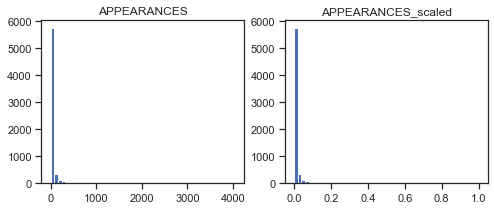

In [45]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## 4. Проведение корреляционного анализа данных. 
## Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [46]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = ['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES_scaled','YEAR', 'dataset'] 
corr_cols_1

['ID',
 'ALIGN',
 'EYE',
 'HAIR',
 'SEX',
 'ALIVE',
 'APPEARANCES_scaled',
 'YEAR',
 'dataset']

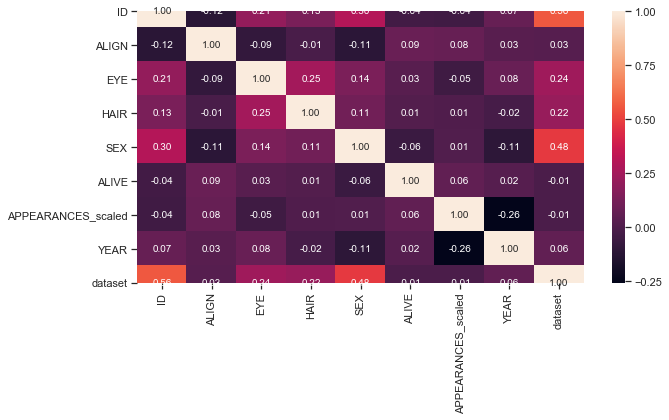

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак классификации "ALIGN" практически ни с чем не коррелирует. Поэтому оставим все параметры, но возможно данная модель никаких результатов не даст. Поэтому в качестве дополнительной классификации я рассматрю признак "dataset" - который коррелирует с "ID", "EYE", "HAIR", "SEX"
- Целевой признак регрессии "APPEARANCE" наиболее сильно коррелирует с "YEAR" (0.26). Эти признаки обязательно следует оставить в модели регрессии.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

## 5. Выбор метрик для последующей оценки качества моделей. 

### 5.1. В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### 1. Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### 2. Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### 3. Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### 4. Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### 5.2) В качестве метрик для решения задачи регрессии будем использовать:

#### 1. [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### 2. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### 3. [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

#### 5.3) Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [48]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## 6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [49]:
X_ASIGN = data.drop(['ALIGN'], axis = 1)
X_ASIGN = X_ASIGN.drop(['APPEARANCES'], axis = 1)
X_ASIGN = X_ASIGN.drop(['name'], axis = 1)
Y_ASIGN = data.ALIGN
print('Входные данные:\n\n', X_ASIGN.head(), '\n\nВыходные данные:\n\n', Y_ASIGN.head())

Входные данные:

    ID  EYE  HAIR  SEX  ALIVE    YEAR  dataset  APPEARANCES_scaled
0   2    2     0    2      1  1939.0        0            0.764968
1   2    2     0    2      1  1986.0        0            0.617269
2   2    3     3    2      1  1959.0        0            0.386937
3   1    3    15    2      1  1987.0        0            0.325334
4   2    2     0    2      1  1940.0        0            0.305789 

Выходные данные:

 0    1
1    1
2    1
3    1
4    1
Name: ALIGN, dtype: int32


In [50]:
X_ASIGN_train,  X_ASIGN_test,  Y_ASIGN_train,  Y_ASIGN_test = train_test_split(X_ASIGN,  Y_ASIGN, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_ASIGN_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_ASIGN_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_ASIGN_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_ASIGN_test.head())

Входные параметры обучающей выборки:

       ID  EYE  HAIR  SEX  ALIVE    YEAR  dataset  APPEARANCES_scaled
1249   1   12    11    0      1  1981.0        0            0.004948
3519   3    3     2    3      1  1993.0        1            0.001979
3304   1    3     3    3      1  2005.0        1            0.002227
1139   3    3     3    1      0  1984.0        1            0.007917
2201   3    3     3    3      1  1981.0        1            0.003711 

Входные параметры тестовой выборки:

       ID  EYE  HAIR  SEX  ALIVE    YEAR  dataset  APPEARANCES_scaled
3590   3    6     3    1      1  2005.0        1            0.001979
1872   3   20    15    1      1  1977.0        1            0.004453
85     2    3    15    3      1  1965.0        1            0.100198
132    1    2    15    0      1  1973.0        0            0.044780
2109   2    3     3    0      0  1999.0        0            0.002474 

Выходные параметры обучающей выборки:

 1249    0
3519    1
3304    2
1139    2
2201    0
N

In [51]:
X_dataset = data.drop(['dataset'], axis = 1)
X_dataset = X_dataset.drop(['APPEARANCES'], axis = 1)
X_dataset = X_dataset.drop(['name'], axis = 1)
Y_dataset = data.dataset
print('Входные данные:\n\n', X_dataset.head(), '\n\nВыходные данные:\n\n', Y_dataset.head())

Входные данные:

    ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  APPEARANCES_scaled
0   2      1    2     0    2      1  1939.0            0.764968
1   2      1    2     0    2      1  1986.0            0.617269
2   2      1    3     3    2      1  1959.0            0.386937
3   1      1    3    15    2      1  1987.0            0.325334
4   2      1    2     0    2      1  1940.0            0.305789 

Выходные данные:

 0    0
1    0
2    0
3    0
4    0
Name: dataset, dtype: int64


In [52]:
X_dataset_train,  X_dataset_test,  Y_dataset_train,  Y_dataset_test = train_test_split(X_dataset,  Y_dataset, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',      X_dataset_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n',   X_dataset_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_dataset_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n',  Y_dataset_test.head())

Входные параметры обучающей выборки:

       ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  APPEARANCES_scaled
1249   1      0   12    11    0      1  1981.0            0.004948
3519   3      1    3     2    3      1  1993.0            0.001979
3304   1      2    3     3    3      1  2005.0            0.002227
1139   3      2    3     3    1      0  1984.0            0.007917
2201   3      0    3     3    3      1  1981.0            0.003711 

Входные параметры тестовой выборки:

       ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  APPEARANCES_scaled
3590   3      2    6     3    1      1  2005.0            0.001979
1872   3      2   20    15    1      1  1977.0            0.004453
85     2      1    3    15    3      1  1965.0            0.100198
132    1      1    2    15    0      1  1973.0            0.044780
2109   2      1    3     3    0      0  1999.0            0.002474 

Выходные параметры обучающей выборки:

 1249    0
3519    1
3304    1
1139    1
2201    1
Name: dataset, dtype: int

In [102]:
X_regr = data.drop(['APPEARANCES'], axis = 1)
X_regr = X_regr.drop(['APPEARANCES_scaled'], axis = 1)
X_regr = X_regr.drop(['name'], axis = 1)
Y_regr = data.APPEARANCES
print('Входные данные:\n\n', X_regr.head(), '\n\nВыходные данные:\n\n', Y_regr.head())

Входные данные:

    ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  dataset
0   2      1    2     0    2      1  1939.0        0
1   2      1    2     0    2      1  1986.0        0
2   2      1    3     3    2      1  1959.0        0
3   1      1    3    15    2      1  1987.0        0
4   2      1    2     0    2      1  1940.0        0 

Выходные данные:

 0    3093.0
1    2496.0
2    1565.0
3    1316.0
4    1237.0
Name: APPEARANCES, dtype: float64


In [103]:
X_regr_train,  X_regr_test,  Y_regr_train,  Y_regr_test = train_test_split(X_regr,  Y_regr, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',      X_regr_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n',   X_regr_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_regr_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n',  Y_regr_test.head())

Входные параметры обучающей выборки:

       ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  dataset
1249   1      0   12    11    0      1  1981.0        0
3519   3      1    3     2    3      1  1993.0        1
3304   1      2    3     3    3      1  2005.0        1
1139   3      2    3     3    1      0  1984.0        1
2201   3      0    3     3    3      1  1981.0        1 

Входные параметры тестовой выборки:

       ID  ALIGN  EYE  HAIR  SEX  ALIVE    YEAR  dataset
3590   3      2    6     3    1      1  2005.0        1
1872   3      2   20    15    1      1  1977.0        1
85     2      1    3    15    3      1  1965.0        1
132    1      1    2    15    0      1  1973.0        0
2109   2      1    3     3    0      0  1999.0        0 

Выходные параметры обучающей выборки:

 1249    21.0
3519     9.0
3304    10.0
1139    33.0
2201    16.0
Name: APPEARANCES, dtype: float64 

Выходные параметры тестовой выборки:

 3590      9.0
1872     19.0
85      406.0
132     182.0
2109     11

## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

### 8.1. Решение задачи классификации

In [55]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [56]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [57]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_dataset_train, Y_dataset_train)
    Y_dataset_pred = model.predict(X_dataset_test)
    precision = precision_score(Y_dataset_test.values, Y_dataset_pred)
    recall = recall_score(Y_dataset_test.values, Y_dataset_pred)
    f1 = f1_score(Y_dataset_test.values, Y_dataset_pred)
    roc_auc = roc_auc_score(Y_dataset_test.values, Y_dataset_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(Y_dataset_test.values, Y_dataset_pred)
    
    labels = ['0', '1']
    cm = confusion_matrix(Y_dataset_test, Y_dataset_pred)
    
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


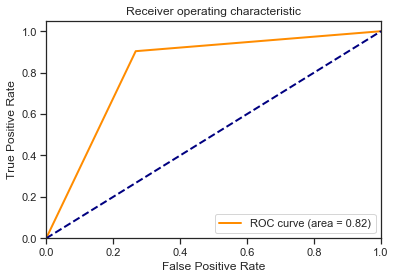

[[148  54]
 [ 43 403]]


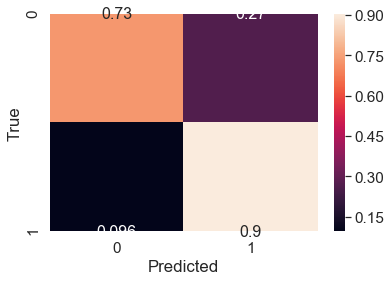

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


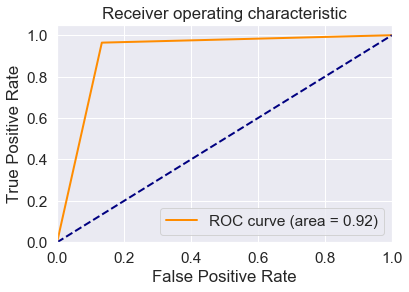

[[175  27]
 [ 16 430]]


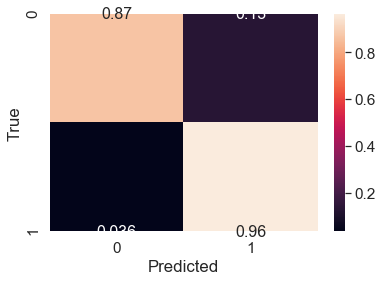

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*****************************************************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
*****************************************************


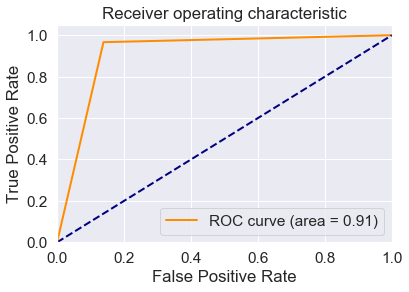

[[174  28]
 [ 15 431]]


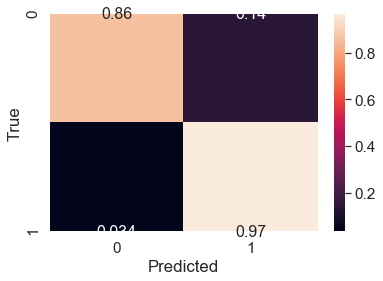

*****************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
*****************************************************


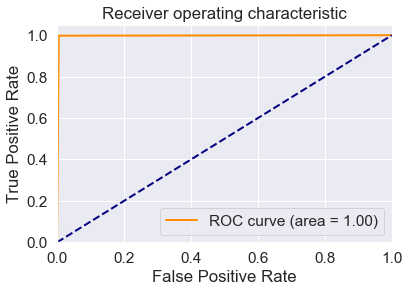

[[201   1]
 [  1 445]]


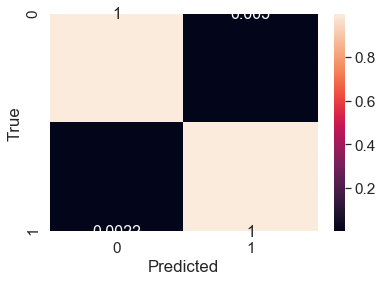

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*****************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


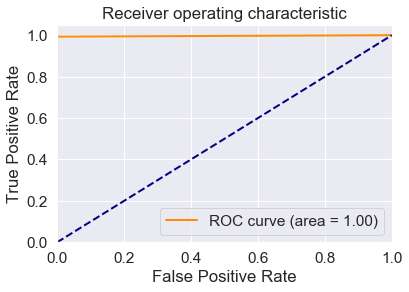

[[202   0]
 [  3 443]]


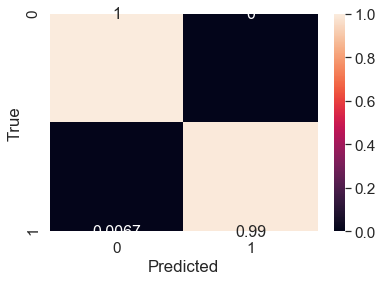

*****************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


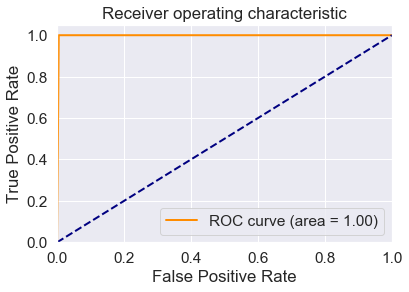

[[201   1]
 [  0 446]]


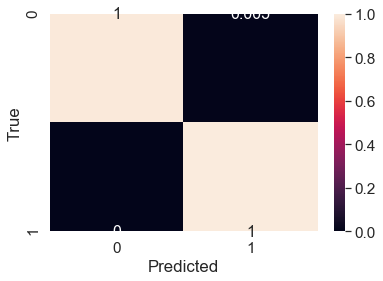

In [58]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

### 8.2. Решение задачи регрессии

#### 8.2.1. Линейная регрессия

In [104]:
Lin_Reg = LinearRegression().fit(X_regr_train, Y_regr_train)

lr_y_regr_pred = Lin_Reg.predict(X_regr_test)

In [105]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_regr_test, lr_y_regr_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_regr_test, lr_y_regr_pred))
print('Median absolute error:',       median_absolute_error(Y_regr_test, lr_y_regr_pred))
print('Коэффициент детерминации:',    r2_score(Y_regr_test, lr_y_regr_pred))

Средняя абсолютная ошибка: 57.85649195139268
Средняя квадратичная ошибка: 24038.362101922874
Median absolute error: 30.781478496190175
Коэффициент детерминации: 0.09760783354536462


No handles with labels found to put in legend.


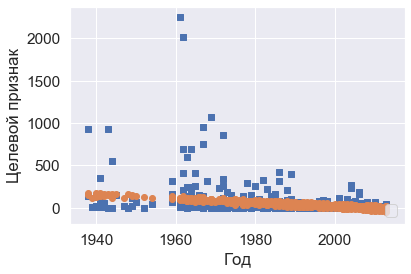

In [107]:
#plt.scatter(X_regr_test.YEAR, Y_regr_test,    marker = 's', label = 'Тестовая выборка')
#plt.scatter(X_regr_test.YEAR, lr_y_regr_pred, marker = 'o', label = 'Предсказанные данные')
plt.scatter(X_regr_test.YEAR, Y_regr_test,    marker = 's')
plt.scatter(X_regr_test.YEAR, lr_y_regr_pred, marker = 'o')
plt.legend (loc = 'lower right')
plt.xlabel ('Год')
plt.ylabel ('Целевой признак')
plt.show()

Обучение далеко не идеальное, но все равно достаточно неплохое

#### 8.2.2. Полимиальная регрессия

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [64]:
regrMetricLogger = MetricLogger()

In [65]:
X_regr = data.drop(['APPEARANCES'], axis = 1)
X_regr = X_regr.drop(['APPEARANCES_scaled'], axis = 1)
X_regr = X_regr.drop(['name'], axis = 1)
Y_regr = data.APPEARANCES

poly = PolynomialFeatures (degree = 2)

X_regr_quad = poly.fit_transform(X_regr)

X_regr_train, X_regr_test, Y_regr_train, Y_regr_test = train_test_split(X_regr_quad, Y_regr, random_state=0, test_size = 0.1)

poly_Lin_Reg = LinearRegression().fit(X_regr_train,Y_regr_train)

poly_y_pred = poly_Lin_Reg.predict(X_regr_test)

In [96]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_regr_train, Y_regr_train)
    Y_regr_pred = model.predict(X_regr_test)
    
    mae = mean_absolute_error(Y_regr_test, Y_regr_pred)
    mse = mean_squared_error(Y_regr_test, Y_regr_pred)
    r2 = r2_score(Y_regr_test, Y_regr_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [91]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=57.594, MSE=23270.907, R2=0.126
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=59.542, MSE=28138.547, R2=-0.056
*****************************************************


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

MAE=44.966, MSE=28147.98, R2=-0.057
*****************************************************
*****************************************************
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

MAE=64.27, MSE=44121.988, R2=-0.656
*****************************************************


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*****************************************************
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

MAE=55.11, MSE=19370.076, R2=0.273
*****************************************************
*****************************************************
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_sa

In [67]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_regr_test, poly_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_regr_test, poly_y_pred))
print('Median absolute error:',       median_absolute_error(Y_regr_test, poly_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_regr_test, poly_y_pred))

Средняя абсолютная ошибка: 57.59425470086941
Средняя квадратичная ошибка: 23270.907455175122
Median absolute error: 27.175075148125075
Коэффициент детерминации: 0.1264178272711427


Судя по коэффициенту детерминации - результат ужасный

## 9. Подбор гиперпараметров для выбранных моделей

### 9.1. Пример для задачи классификации

In [68]:
X_dataset_train.shape

(5823, 8)

In [69]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [70]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_dataset_train, Y_dataset_train)

Wall time: 1min 22s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [71]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1}

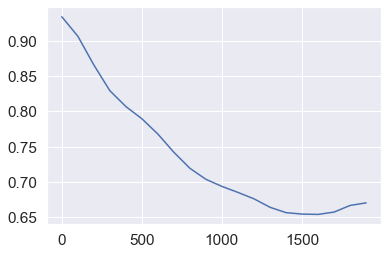

In [73]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### 9.2. Пример для задачи регрессии

In [74]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [75]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_regr, Y_regr)

Wall time: 1min 6s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1901, p=2,
                    weights='uniform')

In [77]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 1901}

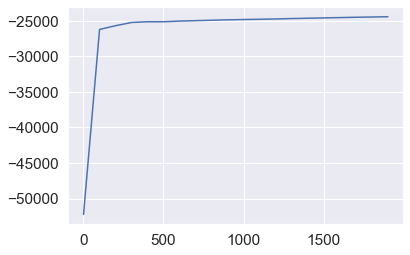

In [78]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## 10. Построение базового решения (baseline) для выбранных моделей

### 10.1. Решение задачи классификации

In [79]:
clas_models_grid = {'KNN_1':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
*****************************************************


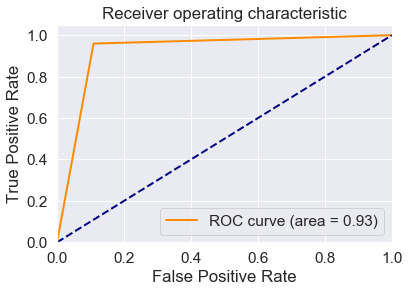

[[180  22]
 [ 18 428]]


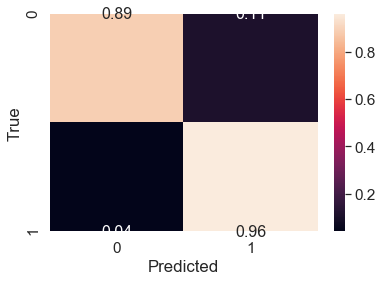

In [80]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

### 10.2. Решение задачи регрессии

In [81]:
regrMetricLogger = MetricLogger()

In [82]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_regr_train, Y_regr_train)
    Y_regr_pred = model.predict(X_regr_test)
    
    mae = mean_absolute_error(Y_regr_test, Y_regr_pred)
    mse = mean_squared_error(Y_regr_test, Y_regr_pred)
    r2 = r2_score(Y_regr_test, Y_regr_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [83]:
regr_models_grid = {'KNN_1901':regr_gs.best_estimator_}

In [84]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1901, p=2,
                    weights='uniform')

MAE=51.733, MSE=24545.698, R2=0.079
*****************************************************


## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик

### 11.1. Решение задачи классификации

In [85]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

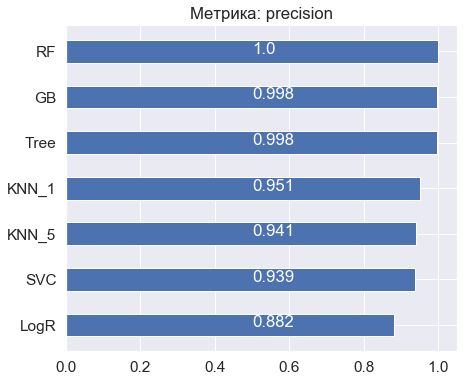

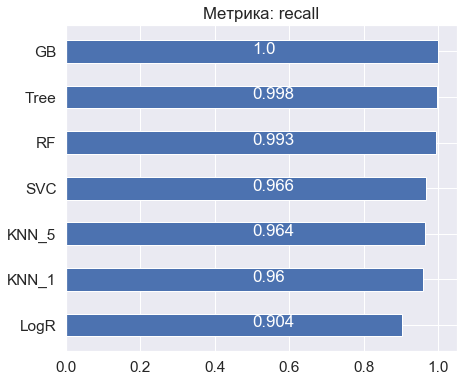

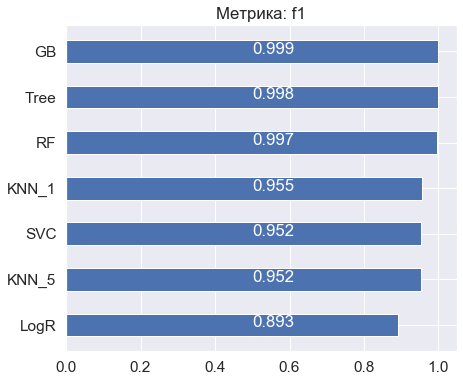

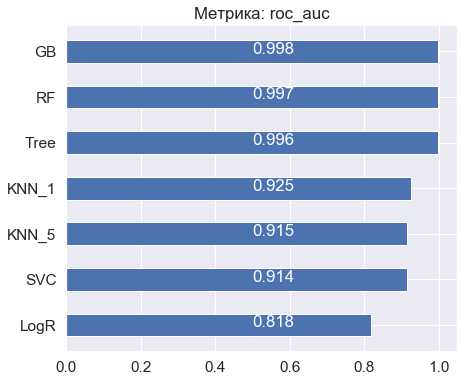

In [86]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

### Вывод: на основании трех метрик из четырех используемых,  лучшей оказалась модель градиентного бустинга

### 11.2) Решение задачи регрессии

In [92]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

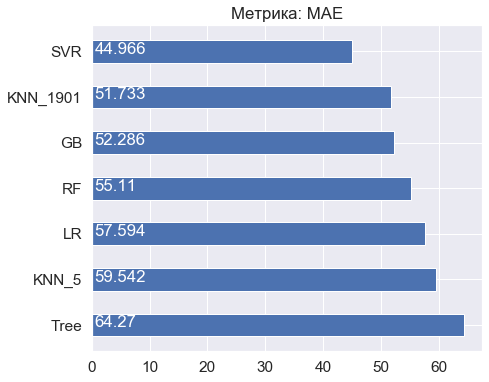

In [93]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

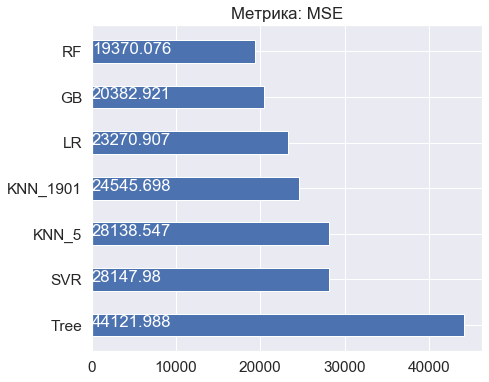

In [94]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

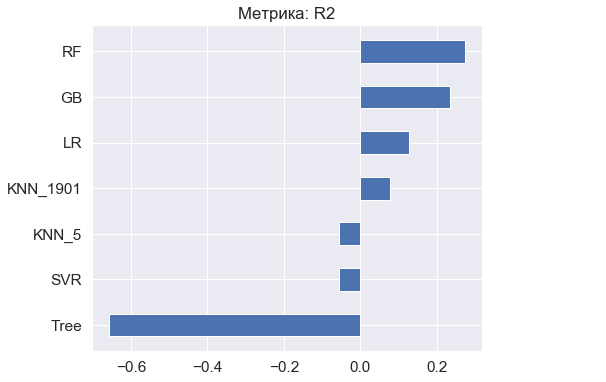

In [95]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

### Вывод: лучшими оказались модели на основе Случайного леса и SVR. Но при одном запуске наиболее эффективным оказался метод градиентного бустинга